In [15]:
from rasterstats import zonal_stats
from multiprocessing import Pool
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

from shapely.geometry import Point
from eumap.misc import find_files, nan_percentile, GoogleSheet
from eumap.raster import read_rasters, save_rasters
from eumap.mapper import SpaceOverlay

years = np.arange(2000,2023,1)
years = [int(y) for y in years]

layers = ['http://192.168.1.30:8333/ai4sh-landmasked/ndvi/ndvi_glad.landast.ard2.seasconv.m.yearly_p50_30m_s_{year}0101_{year}1231_eu_epsg.3035_v20231127.tif',
          'http://192.168.1.30:8333/ai4sh-landmasked/bsf/bsf_glad.landsat.ard2.seasconv.m.yearly_sum_30m_s_{year}0101_{year}1231_eu_epsg.3035_v20231127.tif',
          'http://192.168.1.30:8333/ai4sh-landmasked/ndwi.gao/ndwi.gao_glad.landsat.ard2.seasconv.m.yearly_p50_30m_s_{year}0101_{year}1231_eu_epsg.3035_v20231218.tif',
          'http://192.168.1.30:8333/ai4sh-landmasked/nos/nos_glad.landsat.ard2.seasconv_m_30m_s_{year}0101_{year}1231_eu_epsg.3035_v20231127.tif',
          'http://192.168.1.30:8333/ai4sh/cdr/cdr_glad.landsat.seasconv_m_30m_s_{year}0101_{year}1231_eu_epsg.3035_v20231127.tif']

file_gpkg = f'/mnt/inca/tillage_index/data/010_vld_trend.gpkg'
gpkg = gpd.read_file(file_gpkg)

point = gpkg.iloc[[0,1,2]]
point = point[['point_id', 'nuts2', 'geometry']]
point = point.to_crs('epsg:3035')

# from pathlib import Path
# files = []
# for i in [0,1,2,3,4]:
#     layer = [layers[i].replace('{year}',str(y)) for y in years]
#     files = files + layer
    
# files = [Path(i) for i in files]

# dfo = SpaceOverlay(point, fn_layers=files, max_workers=20, verbose=False)
# dft = dfo.run()
    
    
# dft = dft.drop(columns = 'overlay_id')
# dft.to_csv('/mnt/atlas/tillage_tmp/011_vld_trend.series.csv',index=False)
# # gpkg.to_csv('/mnt/atlas/tillage_tmp/011_test_trend.point.csv',index=False)

dft = pd.read_csv('/mnt/inca/tillage_index/data/012_vld_trend.series.csv')

In [16]:
dft['order'] = ['C','B','A']

columns = dft.columns
ndvi_columns = [col for col in columns if 'ndvi' in col.lower() and 'yearly' in col.lower()]
ndvi_columns.sort()
bsf_columns = [col for col in columns if 'bsf' in col.lower() and 'yearly' in col.lower()]
bsf_columns.sort()
ndwi_columns = [col for col in columns if 'ndwi' in col.lower() and 'yearly' in col.lower()]
ndwi_columns.sort()
nos_columns = [col for col in columns if 'nos' in col.lower()]
nos_columns.sort()
cdr_columns = [col for col in columns if 'cdr' in col.lower()]
cdr_columns.sort()

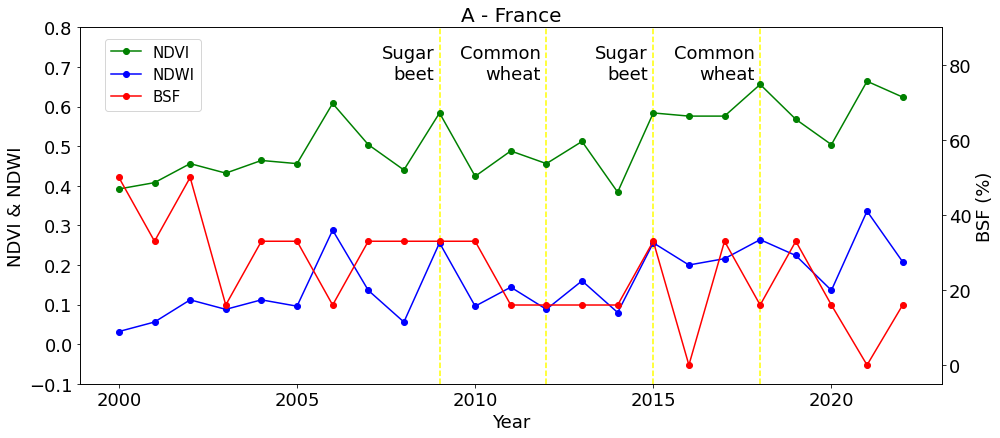

In [45]:
idd = 'A'
point_data = dft[dft['order'] == idd]

land_cover_data = gpkg[gpkg['point_id'] == point_data['point_id'].values[0]][['year', 'lc1_label']].drop_duplicates()
land_cover_data['year'] = land_cover_data['year'].astype(int)
land_cover_data.sort_values(by='year', inplace=True)


ndvi_trends = point_data[ndvi_columns].values.flatten()
ndwi_trends = point_data[ndwi_columns].values.flatten()
bsf_trends = point_data[bsf_columns].values.flatten()

ndvi_scaled = [(x - 125) / 125 for x in ndvi_trends]
ndwi_scaled = [(x - 125) / 125 for x in ndwi_trends]


fig, ax1 = plt.subplots(figsize=(14, 6))
color = 'black' 

ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('NDVI & NDWI', color=color, fontsize=18)

for _, row in land_cover_data.iterrows():
    year = row['year']
    lc_label = row['lc1_label']
    lc_label = lc_label.replace(' ','\n')
    
    ax1.axvline(x=year, color='yellow', linestyle='--')
    ax1.text(year-0.15, 0.67, lc_label, ha='right', fontsize=18, color='black')

ax1.plot(years, ndvi_scaled, label='NDVI', marker='o', color='green')
ax1.plot(years, ndwi_scaled, label='NDWI', marker='o', color='blue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-0.1, 0.8]) 

ax2 = ax1.twinx()  
ax2.set_ylabel('BSF (%)', color=color, fontsize=18)  
ax2.plot(years, bsf_trends, label='BSF', marker='o', color='red')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-5, 90]) 

ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
fig.tight_layout() 
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.95), fontsize=15)
plt.title('A - France', fontsize=20)
plt.show()
fig.savefig('/mnt/inca/tillage_index/qgis_visualization/time.series.france.svg', bbox_inches='tight') 

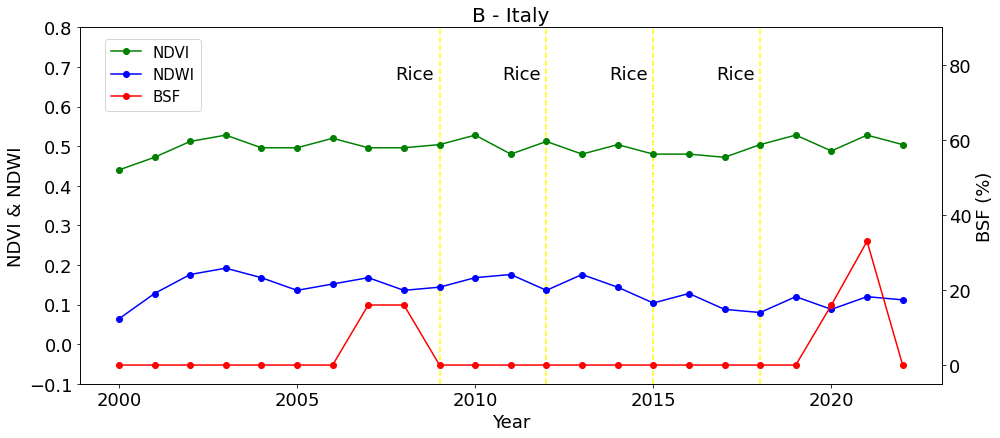

In [44]:
idd = 'B'
point_data = dft[dft['order'] == idd]

land_cover_data = gpkg[gpkg['point_id'] == point_data['point_id'].values[0]][['year', 'lc1_label']].drop_duplicates()
land_cover_data['year'] = land_cover_data['year'].astype(int)
land_cover_data.sort_values(by='year', inplace=True)


ndvi_trends = point_data[ndvi_columns].values.flatten()
ndwi_trends = point_data[ndwi_columns].values.flatten()
bsf_trends = point_data[bsf_columns].values.flatten()

ndvi_scaled = [(x - 125) / 125 for x in ndvi_trends]
ndwi_scaled = [(x - 125) / 125 for x in ndwi_trends]


fig, ax1 = plt.subplots(figsize=(14, 6))
color = 'black' 

ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('NDVI & NDWI', color=color, fontsize=18)

for _, row in land_cover_data.iterrows():
    year = row['year']
    lc_label = row['lc1_label']
    lc_label = lc_label.replace(' ','\n')
    
    ax1.axvline(x=year, color='yellow', linestyle='--')
    ax1.text(year-0.15, 0.67, lc_label, ha='right', fontsize=18, color='black')

ax1.plot(years, ndvi_scaled, label='NDVI', marker='o', color='green')
ax1.plot(years, ndwi_scaled, label='NDWI', marker='o', color='blue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-0.1, 0.8]) 

ax2 = ax1.twinx()  
ax2.set_ylabel('BSF (%)', color=color, fontsize=18)  
ax2.plot(years, bsf_trends, label='BSF', marker='o', color='red')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-5, 90]) 

ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
fig.tight_layout() 
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.95), fontsize=15)
plt.title('B - Italy', fontsize=20)
plt.show()
fig.savefig('/mnt/inca/tillage_index/qgis_visualization/time.series.italy.svg', bbox_inches='tight') 

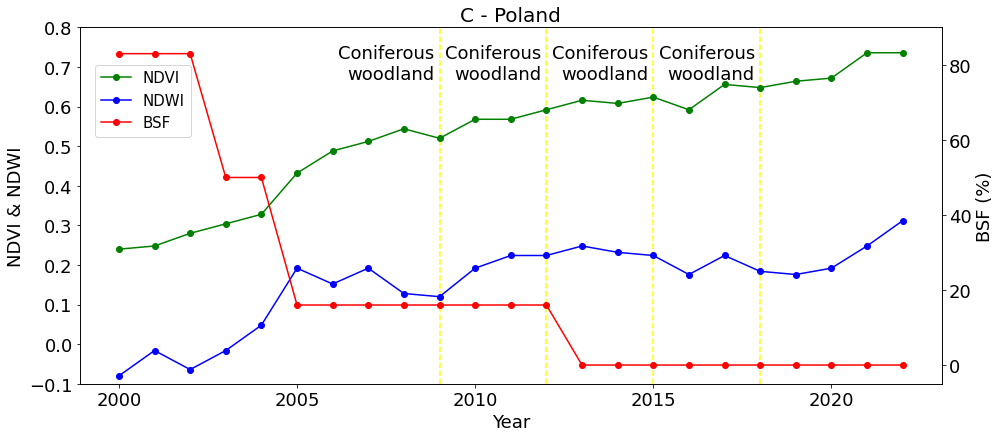

In [43]:
idd = 'C'
point_data = dft[dft['order'] == idd]

land_cover_data = gpkg[gpkg['point_id'] == point_data['point_id'].values[0]][['year', 'lc1_label']].drop_duplicates()
land_cover_data['year'] = land_cover_data['year'].astype(int)
land_cover_data.sort_values(by='year', inplace=True)


ndvi_trends = point_data[ndvi_columns].values.flatten()
ndwi_trends = point_data[ndwi_columns].values.flatten()
bsf_trends = point_data[bsf_columns].values.flatten()

ndvi_scaled = [(x - 125) / 125 for x in ndvi_trends]
ndwi_scaled = [(x - 125) / 125 for x in ndwi_trends]


fig, ax1 = plt.subplots(figsize=(14, 6))
color = 'black' 

ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('NDVI & NDWI', color=color, fontsize=18)

for _, row in land_cover_data.iterrows():
    year = row['year']
    lc_label = row['lc1_label']
    lc_label = 'Coniferous\nwoodland'
#     lc_label = lc_label.replace(' ','\n')
    
    ax1.axvline(x=year, color='yellow', linestyle='--')
    ax1.text(year-0.15, 0.67, lc_label, ha='right', fontsize=18, color='black')

ax1.plot(years, ndvi_scaled, label='NDVI', marker='o', color='green')
ax1.plot(years, ndwi_scaled, label='NDWI', marker='o', color='blue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-0.1, 0.8]) 

ax2 = ax1.twinx()  
ax2.set_ylabel('BSF (%)', color=color, fontsize=18)  
ax2.plot(years, bsf_trends, label='BSF', marker='o', color='red')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-5, 90]) 

ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
fig.tight_layout() 
fig.legend(loc="upper left", bbox_to_anchor=(0.09,0.89), fontsize=15)
plt.title('C - Poland', fontsize=20)
plt.show()
fig.savefig('/mnt/inca/tillage_index/qgis_visualization/time.series.poland.svg', bbox_inches='tight') 

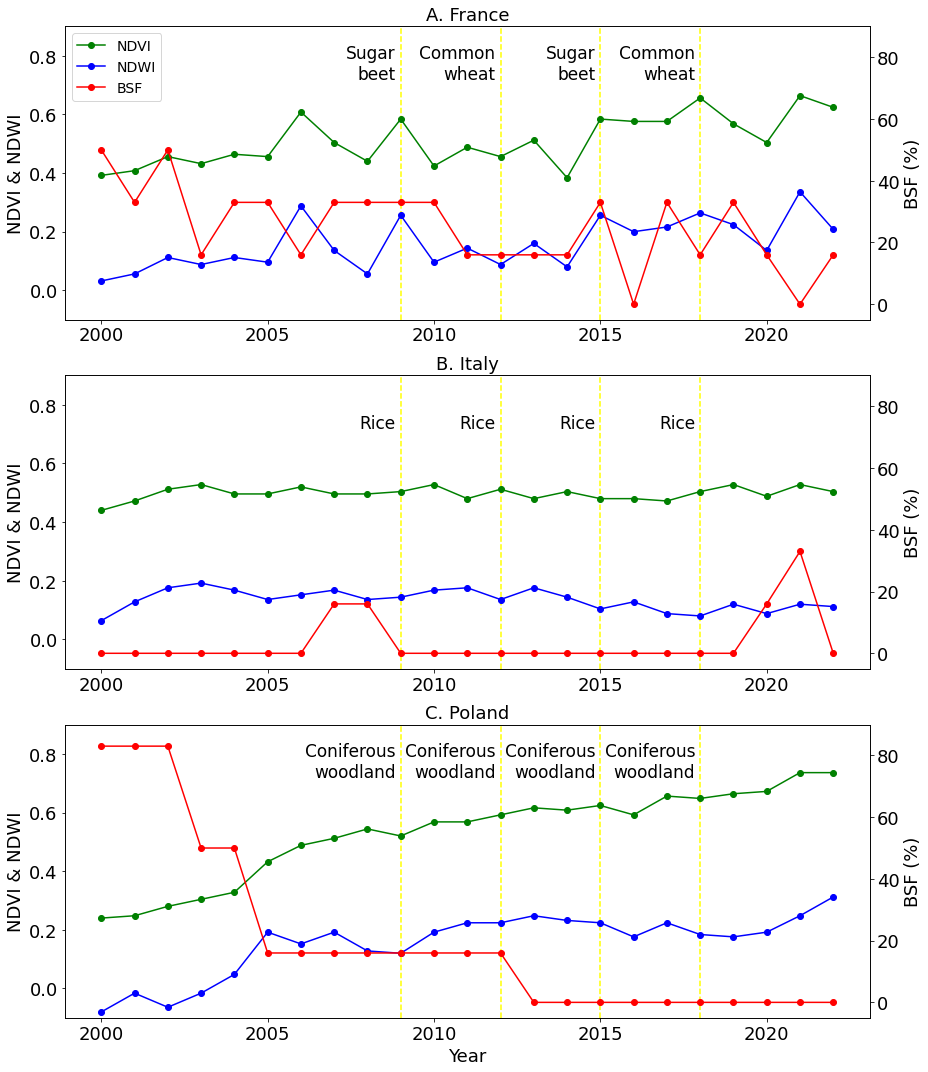

In [14]:

fig = plt.figure(figsize=(13,15))
color = 'black' 

ax11 = fig.add_subplot(311)  
idd = 'A'
point_data = dft[dft['order'] == idd]
ndvi_trends = point_data[ndvi_columns].values.flatten()
ndwi_trends = point_data[ndwi_columns].values.flatten()
bsf_trends = point_data[bsf_columns].values.flatten()
ndvi_scaled = [(x - 125) / 125 for x in ndvi_trends]
ndwi_scaled = [(x - 125) / 125 for x in ndwi_trends]

land_cover_data = gpkg[gpkg['point_id'] == point_data['point_id'].values[0]][['year', 'lc1_label']].drop_duplicates()
land_cover_data['year'] = land_cover_data['year'].astype(int)
land_cover_data.sort_values(by='year', inplace=True)

ax11.set_ylabel('NDVI & NDWI', color=color, fontsize=18)

for _, row in land_cover_data.iterrows():
    year = row['year']
    lc_label = row['lc1_label']
    lc_label = lc_label.replace(' ','\n')
    
    ax11.axvline(x=year, color='yellow', linestyle='--')
    ax11.text(year-0.15, 0.72, lc_label, ha='right', fontsize=17, color='black')

line1 = ax11.plot(years, ndvi_scaled, label='NDVI', marker='o', color='green')
line2 = ax11.plot(years, ndwi_scaled, label='NDWI', marker='o', color='blue')
ax11.tick_params(axis='y', labelcolor=color)
ax11.set_ylim([-0.1, 0.9]) 

ax12 = ax11.twinx()  
ax12.set_ylabel('BSF (%)', color=color, fontsize=18)  
line3 = ax12.plot(years, bsf_trends, label='BSF', marker='o', color='red')
ax12.tick_params(axis='y', labelcolor=color)
ax12.set_ylim([-5, 90]) 

ax11.set_title('A. France', fontsize=18)
handles = [line1[0], line2[0], line3[0]] 
labels = ['NDVI', 'NDWI', 'BSF']
ax11.legend(handles, labels, loc="upper left", bbox_to_anchor=(0,1),fontsize=14)
ax11.tick_params(labelsize=18)
ax12.tick_params(labelsize=18)

ax21 = fig.add_subplot(312)  # 3 rows, 1 column, second plot
idd = 'B'
point_data = dft[dft['order'] == idd]

land_cover_data = gpkg[gpkg['point_id'] == point_data['point_id'].values[0]][['year', 'lc1_label']].drop_duplicates()
land_cover_data['year'] = land_cover_data['year'].astype(int)
land_cover_data.sort_values(by='year', inplace=True)


ndvi_trends = point_data[ndvi_columns].values.flatten()
ndwi_trends = point_data[ndwi_columns].values.flatten()
bsf_trends = point_data[bsf_columns].values.flatten()

ndvi_scaled = [(x - 125) / 125 for x in ndvi_trends]
ndwi_scaled = [(x - 125) / 125 for x in ndwi_trends]

ax21.set_ylabel('NDVI & NDWI', color=color, fontsize=18)

for _, row in land_cover_data.iterrows():
    year = row['year']
    lc_label = row['lc1_label']
    lc_label = lc_label.replace(' ','\n')
    
    ax21.axvline(x=year, color='yellow', linestyle='--')
    ax21.text(year-0.15, 0.72, lc_label, ha='right', fontsize=17, color='black')

ax21.plot(years, ndvi_scaled, label='NDVI', marker='o', color='green')
ax21.plot(years, ndwi_scaled, label='NDWI', marker='o', color='blue')
ax21.tick_params(axis='y', labelcolor=color)
ax21.set_ylim([-0.1, 0.9]) 

ax22 = ax21.twinx()  
ax22.set_ylabel('BSF (%)', color=color, fontsize=18)  
ax22.plot(years, bsf_trends, label='BSF', marker='o', color='red')
ax22.tick_params(axis='y', labelcolor=color)
ax22.set_ylim([-5, 90]) 

ax21.set_title('B. Italy', fontsize=18)
ax21.tick_params(labelsize=18)
ax22.tick_params(labelsize=18)

ax31 = fig.add_subplot(313)  # 3 rows, 1 column, third plot
idd = 'C'
point_data = dft[dft['order'] == idd]

land_cover_data = gpkg[gpkg['point_id'] == point_data['point_id'].values[0]][['year', 'lc1_label']].drop_duplicates()
land_cover_data['year'] = land_cover_data['year'].astype(int)
land_cover_data.sort_values(by='year', inplace=True)


ndvi_trends = point_data[ndvi_columns].values.flatten()
ndwi_trends = point_data[ndwi_columns].values.flatten()
bsf_trends = point_data[bsf_columns].values.flatten()

ndvi_scaled = [(x - 125) / 125 for x in ndvi_trends]
ndwi_scaled = [(x - 125) / 125 for x in ndwi_trends]

ax31.set_xlabel('Year', fontsize=18)
ax31.set_ylabel('NDVI & NDWI', color=color, fontsize=18)

for _, row in land_cover_data.iterrows():
    year = row['year']
    lc_label = row['lc1_label']
    lc_label = 'Coniferous\nwoodland'
    
    ax31.axvline(x=year, color='yellow', linestyle='--')
    ax31.text(year-0.15, 0.72, lc_label, ha='right', fontsize=17, color='black')

ax31.plot(years, ndvi_scaled, label='NDVI', marker='o', color='green')
ax31.plot(years, ndwi_scaled, label='NDWI', marker='o', color='blue')
ax31.tick_params(axis='y', labelcolor=color)
ax31.set_ylim([-0.1, 0.9]) 

ax32 = ax31.twinx()  
ax32.set_ylabel('BSF (%)', color=color, fontsize=18)  
ax32.plot(years, bsf_trends, label='BSF', marker='o', color='red')
ax32.tick_params(axis='y', labelcolor=color)
ax32.set_ylim([-5, 90]) 

ax31.tick_params(labelsize=18)
ax32.tick_params(labelsize=18)
ax31.set_title('C. Poland', fontsize=18)


plt.tight_layout()
plt.show()
fig.savefig('/mnt/inca/tillage_index/qgis_visualization/main-figure-08-time.series.png', bbox_inches='tight')  # Save as PNG with 300 DPI

